o 데이터 불러오기

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('D:/workplace/train.csv')
df.shape
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


o 데이터 타입

In [5]:
df.info()
#MSSUBCLASS -> object형으로 변환
#overallQual, OverallCond -> object 변환

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

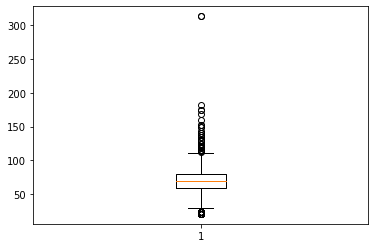

In [5]:
plt.boxplot(df['LotFrontage'][df['LotFrontage'].notna()])
plt.show()

In [18]:
df['MSSubClass'] = df['MSSubClass'].astype(object)
df['OverallQual']= df['OverallQual'].astype(object)
df['OverallCond']= df['OverallCond'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [11]:
# response data 특성 확인
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

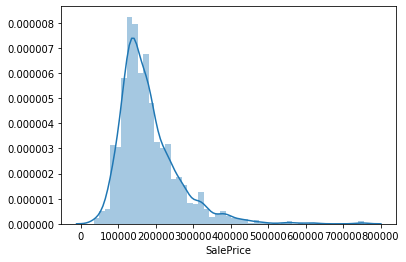

In [12]:
sns.distplot(df['SalePrice']) #분포가 정규분포형으로 나타남

o 결측치 확인

In [19]:
miss = df.isnull().sum().sort_values(ascending=False)
miss.head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
YearRemodAdd       0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
Exterior2nd        0
Exterior1st        0
RoofMatl           0
RoofStyle          0
YearBuilt          0
dtype: int64

o 결측치 현황
 - PoolQC          1453 -> 거의 대부분이 결측치로 해당 변수 제거, 변수 사용 x
 - MiscFeature     1406 -> 거의 대부분이 결측치로 해당 변수 제거, 변수 사용 x
 - Alley           1369 -> 가격이 높을 수록 포장되어있는 양상 보임. 변수 사용o
 - Fence           1179 -> 뚜렷한 양상은 보이지 않음. 해당 변수 사용 x
 - FireplaceQu      690 -> 가격 낮을수록 poor에 많이 분포. 변수 사용o
 - LotFrontage      259 -> 약한 상관관계가 있음. 우선 평균 사용. 변수 사용 o
 - GarageCond        81  -> 81인 값들 왜 데이터가 비었는지 양상 확인하기
 - GarageType        81
 - GarageYrBlt       81
 - GarageFinish      81
 - GarageQual        81
 - BsmtExposure      38 -> 변수 사용 x
 - BsmtFinType2      38 -> 변수 사용 x
 - BsmtFinType1      37 -> 변수 사용 x
 - BsmtCond          37 -> 변수 사용 x
 - BsmtQual          37 -> 가격 높을수록 상태가 좋은 양상을 보임
 - MasVnrArea         8 -> 0.5 상관관계 보임. 
 - MasVnrType         8 -> 변수 사용 x
 - Electrical         1 -> 적으므로 삭제, 변수 사용 x

In [29]:
elec = df['Electrical']
elec.isna()
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max()

miss = df.isnull().sum().sort_values(ascending=False)
miss.head(30)

PoolQC          1452
MiscFeature     1405
Alley           1368
Fence           1178
FireplaceQu      689
LotFrontage      259
GarageType        81
GarageCond        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Exterior2nd        0
Exterior1st        0
OverallCond        0
ExterQual          0
ExterCond          0
Foundation         0
RoofMatl           0
RoofStyle          0
YearRemodAdd       0
YearBuilt          0
SalePrice          0
OverallQual        0
dtype: int64

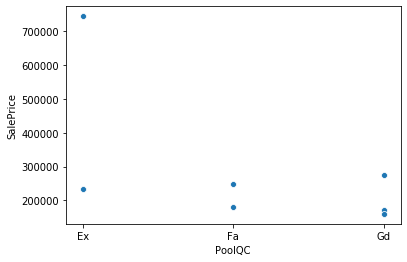

In [32]:
sns.scatterplot(data=df, x='PoolQC', y = 'SalePrice') 

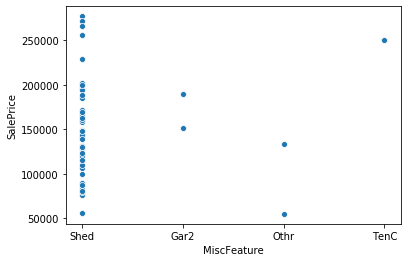

In [33]:
sns.scatterplot(data=df, x='MiscFeature', y='SalePrice')

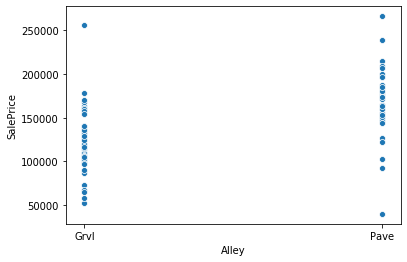

In [35]:
sns.scatterplot(data=df, x='Alley', y='SalePrice') 

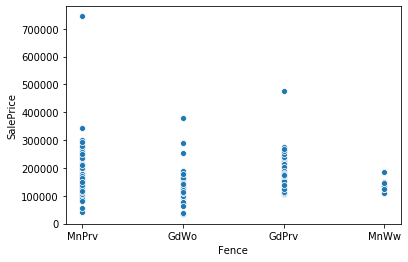

In [36]:
sns.scatterplot(data=df, x='Fence', y='SalePrice') 

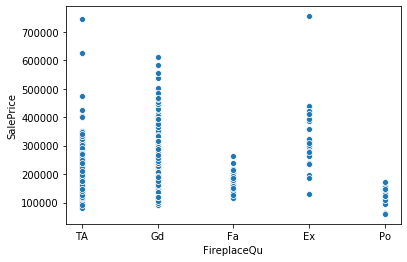

In [37]:
sns.scatterplot(data=df, x='FireplaceQu', y='SalePrice') 

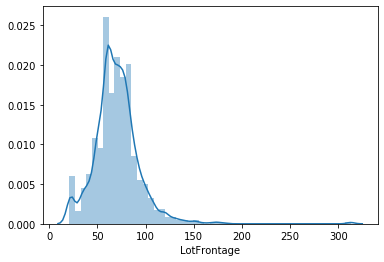

In [30]:
sns.distplot(df['LotFrontage'])

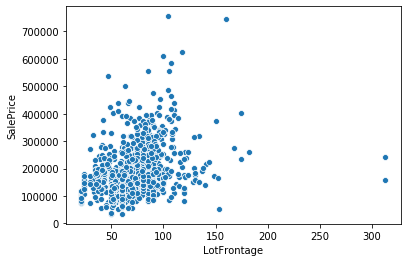

In [33]:
sns.scatterplot(data=df, x='LotFrontage', y = 'SalePrice') 
#확실하게 관계가 있어 보이지는 않음, 상관관계 확인 후 처리

In [35]:
df.corr()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,-0.010601,-0.033226,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
LotFrontage,-0.010601,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
YearBuilt,-0.012713,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,0.049900,0.111170,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378
BsmtUnfSF,-0.007940,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,-0.209294,1.000000,0.415360,...,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.104810,0.415360,1.000000,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581


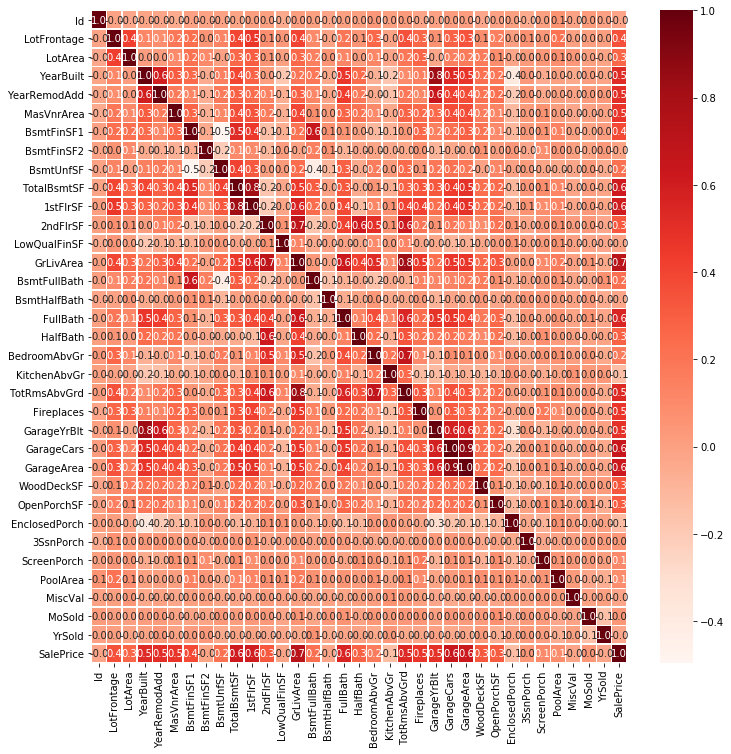

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr(), annot=True, fmt = '.1f', linewidths=.5, cmap = 'Reds')
#낮은 상관관계가 있음, 삭제 보류

In [7]:
#결측치 우선 컬럼 평균으로 대체
df.LotFrontage = df.LotFrontage.fillna(df.LotFrontage.mean())
df.isnull().sum() 

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

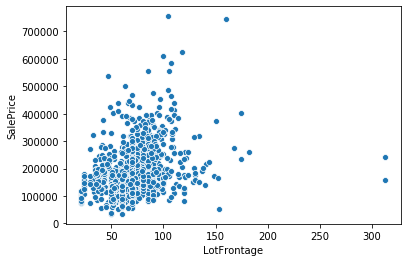

In [9]:
sns.scatterplot(data=df, x='LotFrontage', y = 'SalePrice') 

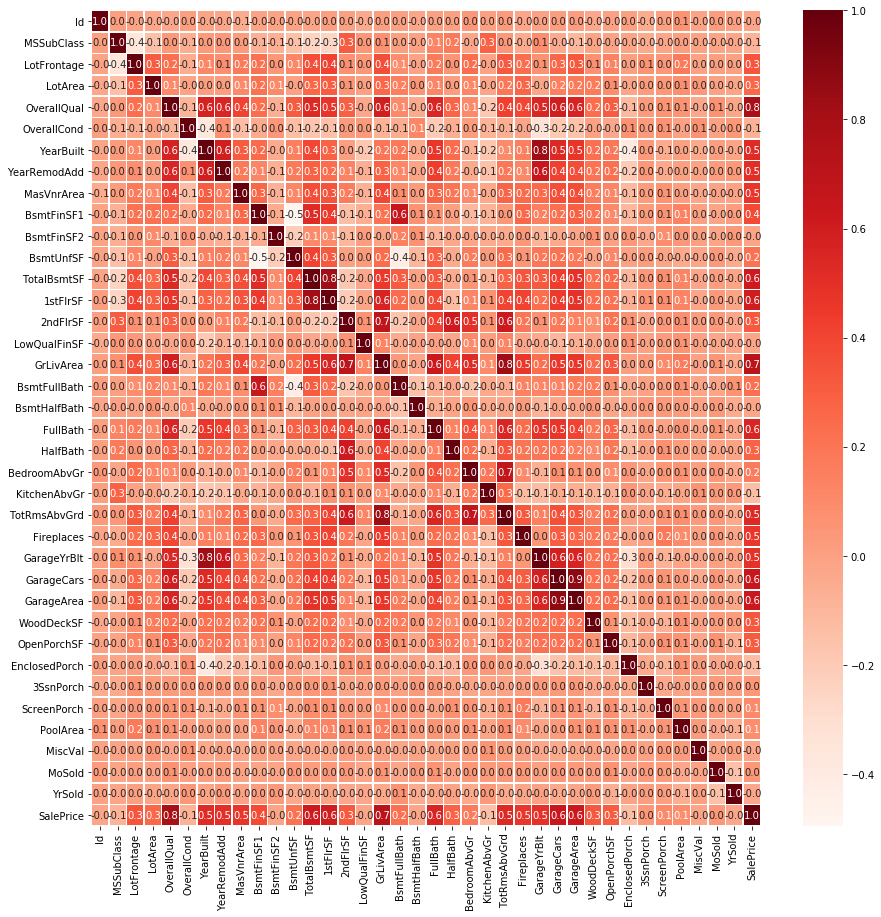

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(), annot=True, fmt = '.1f', linewidths=.5, cmap = 'Reds')
#Lot Frontage 상관관계 0.4에서 0.3으로 조금 변동 있음. 일단 보류

o 결측치와 반응변수 그래프 그려서 판단

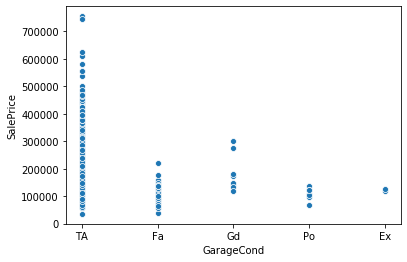

In [38]:
sns.scatterplot(data=df, x='GarageCond', y = 'SalePrice') 

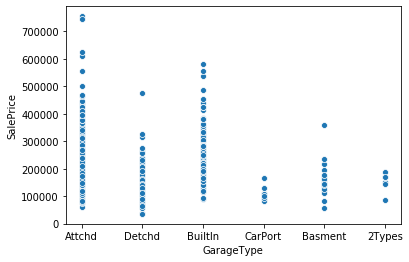

In [39]:
sns.scatterplot(data=df, x='GarageType', y = 'SalePrice') 

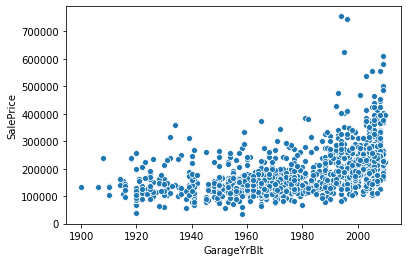

In [40]:
sns.scatterplot(data=df, x='GarageYrBlt', y = 'SalePrice') #상관관계 0.5 어느정도 관계가 있음

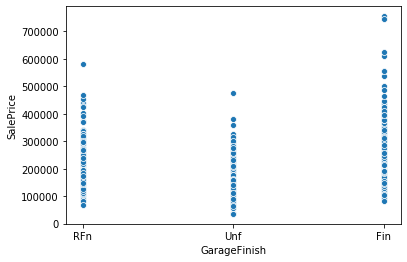

In [41]:
sns.scatterplot(data=df, x='GarageFinish', y = 'SalePrice') 

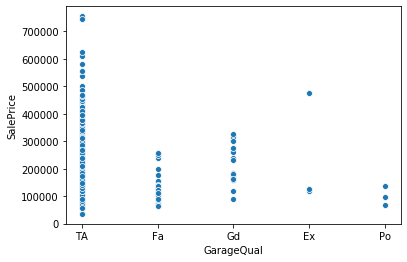

In [42]:
sns.scatterplot(data=df, x='GarageQual', y = 'SalePrice') 

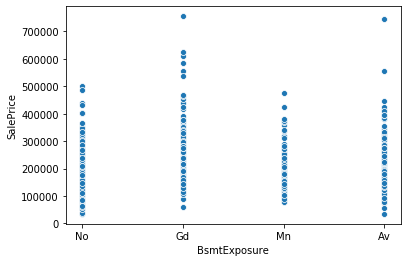

In [43]:
sns.scatterplot(data=df, x='BsmtExposure', y = 'SalePrice') 

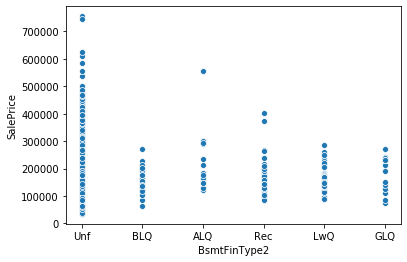

In [45]:
sns.scatterplot(data=df, x='BsmtFinType2', y = 'SalePrice') 

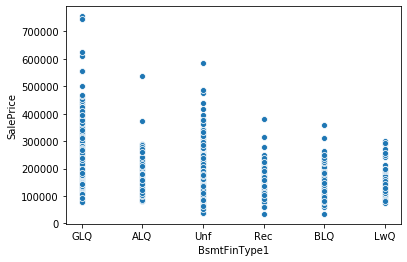

In [46]:
sns.scatterplot(data=df, x='BsmtFinType1', y = 'SalePrice') 

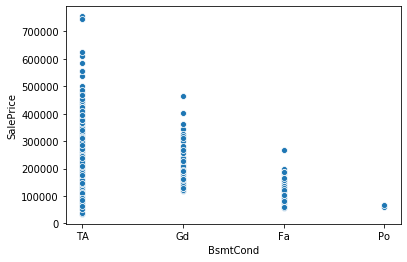

In [47]:
sns.scatterplot(data=df, x='BsmtCond', y = 'SalePrice') 

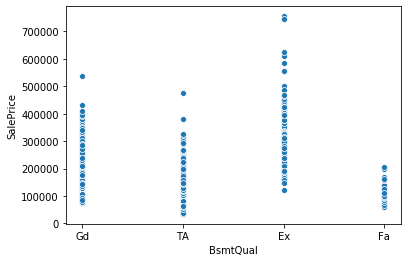

In [48]:
sns.scatterplot(data=df, x='BsmtQual', y = 'SalePrice') 

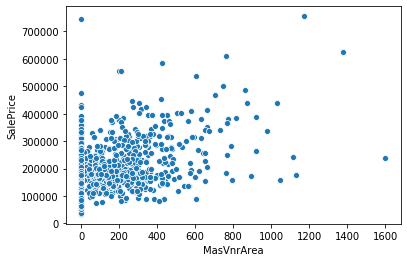

In [49]:
sns.scatterplot(data=df, x='MasVnrArea', y = 'SalePrice') 

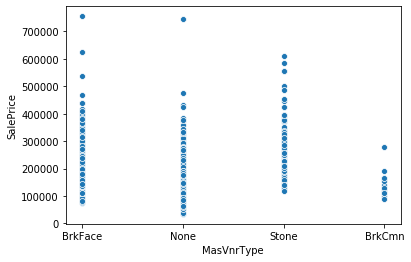

In [50]:
sns.scatterplot(data=df, x='MasVnrType', y = 'SalePrice') 